In [2]:
import numpy as np
import numpy.matlib
from numpy.matlib import repmat
import math as m
import os
from scipy.linalg import toeplitz
from scipy.special import gamma
from scipy.interpolate import interp1d
import scipy.sparse
import scipy
from genDrops_python.genSingleDrop import *
from genDrops_python.fit_circle_through_3_points import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

In [11]:
def plt_image_needle(r_a,z_a,path,l_needle=4,sigma=0,volume0=0,rneedle=1):
    path=os.path.abspath('./')
    path=path+"/s%.2f_v%.2f_rn%.2f_ln%.2f_needle.jpg" %(sigma, volume0, rneedle,l_needle)
    plt.figure(figsize=(4,4))
    plt.plot(r_a,z_a,color='black')
    plt.plot(-r_a,z_a,color='black')
    
    plt.fill_between(r_a,l_needle,0,color='black')
    plt.fill_between(-r_a,l_needle,0,color='black')
    plt.fill_between(r_a,0,z_a,color='black')
    plt.fill_between(-r_a,0,z_a,color='black')

    plt.axis('equal')
    plt.axis('off')
    plt.savefig(path)



def remove_edge_figure(img_path): 
    img = mpimg.imread(img_path)
    ini_size = img.shape
    x = 0
    xx = img.shape[0]
    y = 0
    yy = img.shape[1]
    for channel in range(img.shape[2]):
        for i in np.arange(0, img.shape[0], 1):
            if img[i, :, channel].sum() != img.shape[1]:
                x = max(x, i)
                break
        for i in np.arange(img.shape[0] - 1, -1, -1):
            if img[i, :, channel].sum() != img.shape[1]:
                xx = min(xx, i)
                break
        for j in np.arange(0, img.shape[1], 1):
            if img[:, j, channel].sum() != img.shape[0]:
                y = max(y, j)
                break
        for j in np.arange(img.shape[1] - 1, -1, -1):
            if img[:, j, channel].sum() != img.shape[0]:
                yy = min(yy, j)
                break
    cutted_res = img[x - 5:xx + 5, y - 5:yy + 5, :]
    return cutted_res, ini_size, cutted_res.shape

In [6]:
sigma=73
volume0=20
rneedle=0.5

iter > 1200!
iter > 1200!


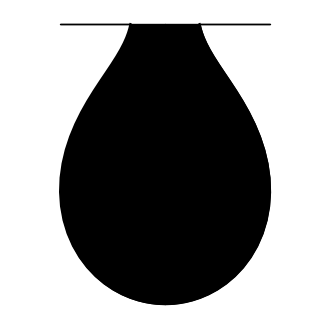

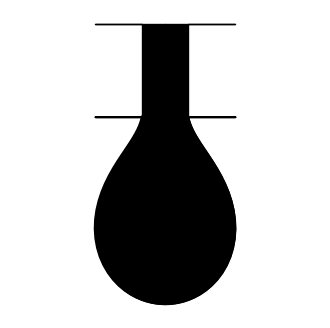

In [13]:
from genDrops_python.genSingleDrop import *
# plot the shape of the drop on the plotting grid
#path=savepath+"/s%.2f_v%.2f_rn%.2f.jpg" %(sigma, volume0, rneedle)
path=os.path.abspath('./')
sigma=73
volume0=18
rneedle=0.5
genSingleDrop(path,sigma=sigma,volume0=volume0,rneedle=rneedle,output=0)
r_a,z_a=genSingleDrop(path,sigma=sigma,volume0=volume0,rneedle=rneedle,output=1)
plt_image_needle(r_a,z_a,path,sigma=sigma,volume0=volume0,rneedle=rneedle)

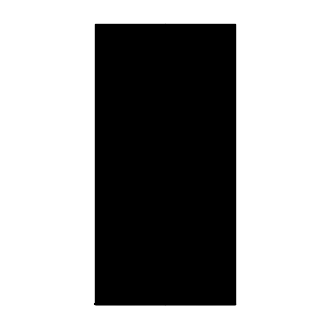

In [65]:
path=os.path.abspath('./')
path=path+"/needle_s%.2f_v%.2f_rn%.2f.jpg" %(sigma, volume0, rneedle)
plt.figure(figsize=(4,4))
plt.plot(r_a,z_a,color='black')
plt.plot(-r_a,z_a,color='black')
l_needle=4
plt.fill_between(r_a,l_needle,0,color='black')
plt.fill_between(-r_a,l_needle,0,color='black')
plt.fill_between(r_a,0,z_a,color='black')
plt.fill_between(-r_a,0,z_a,color='black')

plt.axis('equal')
plt.axis('off')
plt.savefig(path)

In [57]:
path_img=os.path.abspath('./needle_s0.00_v0.00_rn1.00.jpg')
cutted_figure, ini_size, final_size=remove_edge_figure(path_img)
mpimg.imsave(path + 'resize.png', cutted_figure)
print(path + 'resize.png')

d:\OneDrive\Documents\GitHub\Bayesian_PendantDrop_Tensiometry/needle_s73.00_v20.00_rn0.50.jpgresize.png


0.5489700036140224


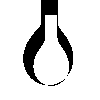

In [15]:
from cost_function import cost, img2bw
import os.path
import glob
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img_gen=Image.open('./s73.00_v18.00_rn0.50_ln4.00_needle.jpg')
img_ori=Image.open('./Images_Experiment/220304_miliq_T17.7_S73.04.png')
ac,C=cost(img_ori,img_gen)
print(ac)
Image.fromarray(np.uint8(C))